## Quantitative Analysis / Time Series Stuff (1)


### Table of Contents 
- Time Series Data Cleaning & Processing 
    - Dickey-Fuller Test 
    - Augmented Dickey-Fuller Testing for Unit Roots 
    - Phillips and Perron Tests 

- Cointegration Testing 
    - Johanson Methods 

### Unit Roots Tests 
Let us consider a time series Yt in the form $$ Y_t = \alpha + \beta Y_{t-1} + u_t $$ $$ u_t - \rho u_{t-1} | \epsilon_t $$

In [9]:
# Install the yfinance module
import yfinance as yf
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import numpy as np 

In [10]:
bto = yf.Ticker("BZ=F")
clf = yf.Ticker("CL=F")
coaca = yf.Ticker("CC=F")
sugar = yf.Ticker("SB=F")
spy = yf.Ticker("SPY")
kmx = yf.Ticker("KMX")


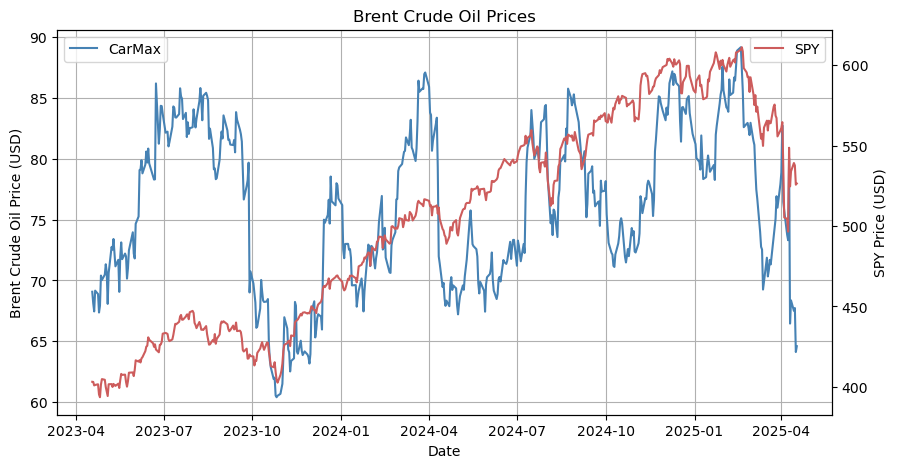

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure and axes
ax2 = ax.twinx()  # Create a twin axes sharing the x-axis

ax.set_title("Brent Crude Oil Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Brent Crude Oil Price (USD)")
ax2.set_ylabel("SPY Price (USD)")

ax.grid()
ax.plot(kmx.history(period="2y")["Close"], label="CarMax", color='steelblue')
ax2.plot(spy.history(period="2y")["Close"], label="SPY", color='indianred')

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

### Auto-Correlation & Cross Correlation 
Autocorrelation means when the errors we observe from our regression is not exactly random errors, meaning they have an observable or testable patterns (whether that's first order or higher orders), for example, seasonality of oil prices is one factor that contributes to the auto-correlation of its price data.

- **The Visual Inspection Method**
    - As shown below, we could run a regression first on the SPY stock chart, then we generate its residual plot, a **residual plot** means that we are turning the regression line to y=0, and vertifically shift the associated data points by the same distance quantified by the errors values. 
- 

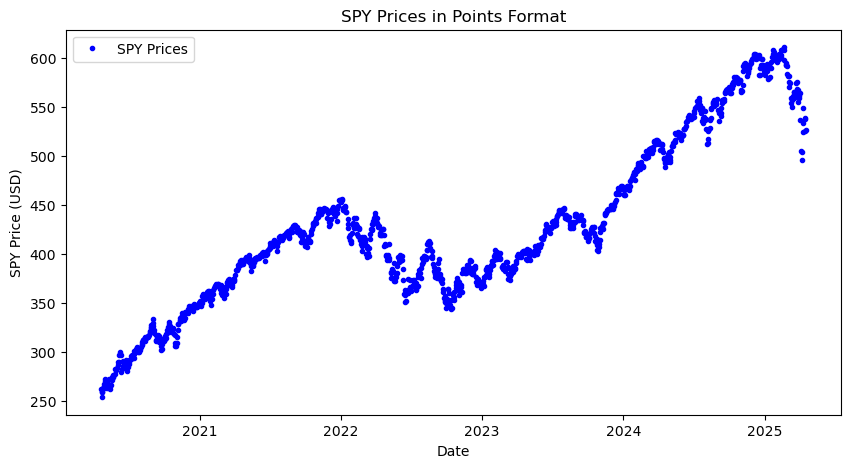

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))  # Create a new figure and axes

ax.set_title("SPY Prices in Points Format")
ax.set_xlabel("Date")
ax.set_ylabel("SPY Price (USD)")

ax.plot(spy.history(period="5y")["Close"], marker='.', linestyle='', label="SPY Prices", color='blue')

ax.legend()
plt.show()

